# Exemple: simulation d'une loi discrète

Soit $X$ la variable aléatoire discrète sur $\{1,\dots,5\}$ définie par $\mathbf{P}(X = k) = p_k$ avec

$$
    p_1 = 0.1, \quad p_2 = 0.4, \quad p_3 = p_4 = 0.2, \quad p_5 = 0.1
$$

In [1]:
import numpy as np
from numpy.random import default_rng, SeedSequence
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sq = SeedSequence()
rng = default_rng(sq)

In [2]:
state = np.arange(1, 6)
pk = np.array([0.1, 0.4, 0.2, 0.2, 0.1])
cum_pk = np.cumsum(pk)
print("state:\t", state)
print("pk:\t", pk)
print("cum_pk:\t", cum_pk)

state:	 [1 2 3 4 5]
pk:	 [0.1 0.4 0.2 0.2 0.1]
cum_pk:	 [0.1 0.5 0.7 0.9 1. ]


## Construction de la fonction quantile

In [3]:
def cdf(x): 
    extend_cum_pk = np.insert(cum_pk, 0, 0)
    idx = np.searchsorted(state, x, side='right')
    return extend_cum_pk[ idx ]

In [4]:
def quantile(u):
    extend_state = np.append(state, state[-1])
    idx = np.searchsorted(cum_pk, u, side='left')
    return extend_state[ idx ]

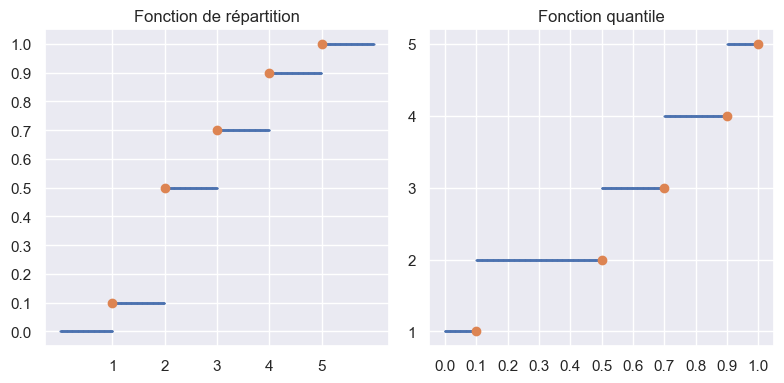

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), nrows=1, ncols=2, layout='tight')
xx = np.linspace(0, 6, 1000)
ax1.scatter(xx, cdf(xx), marker='.', s=1) 
ax1.scatter(state, cdf(state))
ax1.set_xticks(state)
ax1.set_yticks(np.linspace(0, 1, 11))
ax1.set_title("Fonction de répartition")
uu = np.linspace(0, 1, 1000)
ax2.scatter(uu, quantile(uu), marker='.', s=1)
ax2.scatter(cum_pk, quantile(cum_pk))
ax2.set_yticks(state)
ax2.set_xticks(np.linspace(0, 1, 11))
ax2.set_title("Fonction quantile")
plt.show()

## Simulation 

In [7]:
quantile(rng.random(100))

array([3, 2, 2, 4, 1, 2, 4, 2, 4, 4, 2, 4, 3, 5, 1, 2, 2, 5, 2, 4, 5, 2,
       3, 3, 3, 2, 2, 5, 3, 5, 2, 5, 3, 2, 4, 5, 2, 4, 2, 5, 3, 1, 2, 2,
       3, 3, 4, 5, 2, 2, 3, 3, 2, 5, 4, 3, 2, 5, 5, 1, 2, 3, 4, 4, 4, 2,
       1, 3, 4, 3, 5, 3, 3, 4, 2, 4, 3, 3, 4, 1, 5, 2, 2, 1, 3, 2, 3, 4,
       4, 2, 3, 2, 4, 2, 2, 2, 4, 4, 2, 4])

https://docs.scipy.org/doc/scipy/tutorial/stats/sampling_dgt.html